# Day 37 – Inferential Statistics 

In this notebook, I studied the core concepts of Inferential Statistics including probability, distributions, standardization, standard error, and confidence intervals, with practical examples.


Inferential statistics is a powerful branch of statistics that allows us to make predictions and draw conclusions about a larger population based on a smaller sample. Unlike descriptive statistics (which summarizes data), inferential statistics uses probability theory, distributions, and hypothesis testing to generalize findings.

---

## 1. Probability

Probability is the likelihood of an event occurring, ranging from 0 (impossible) to 1 (certain). It's the foundation for all statistical inference.

### 1.1 Coin Toss
Let's start with a simple example: tossing a fair coin.
- The possible outcomes are Heads or Tails.
- The probability of getting heads is 1/2 or 0.5.
- The probability of getting tails is also 1/2 or 0.5.


In [8]:
import random

outcomes = ["Head", "Tail"]
coin_toss = random.choice(outcomes)
print("Coin Toss Result:", coin_toss)

Coin Toss Result: Head


### 1.2 Dice Roll 
Now, let's consider rolling a single die.
- The possible outcomes are the numbers 1, 2, 3, 4, 5, or 6.
- The probability of rolling any specific number, say a 5, is 1/6.

In [5]:
dice_roll = random.randint(1, 6)
print("Dice Roll Result:", dice_roll)

# Probability Example: probability of rolling a 4
favorable = 1
total_outcomes = 6
probability_5 = favorable / total_outcomes
print("P(rolling a 5):", probability_5)

Dice Roll Result: 2
P(rolling a 5): 0.16666666666666666


---

## 2. Distribution
The way data is spread out is called its distribution. Understanding data distribution is crucial for inferential statistics.

### 2.1 Uniform Distribution (Single Dice Roll)
When you roll a single die, each outcome (1, 2, 3, 4, 5, 6) has an equal probability of 1/6. This is an example of a uniform distribution, where all outcomes are equally likely.

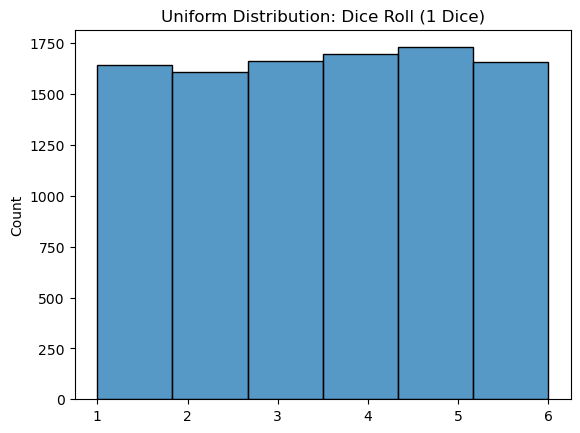

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Uniform distribution - 1 dice roll
dice_rolls = np.random.randint(1, 7, size=10000)
sns.histplot(dice_rolls, bins=6, kde=False)
plt.title("Uniform Distribution: Dice Roll (1 Dice)")
plt.show()

### 2.2 Normal Distribution (Two Dice Rolls)
When you roll two dice and sum the outcomes, the distribution of the sums is different. For example:
- The sum of 2 can only be achieved with (1, 1).

- The sum of 7 can be achieved with (1, 6), (2, 5), (3, 4), (4, 3), (5, 2), and (6, 1).

- Sums closer to the middle (like 7) are much more likely than sums at the extremes (like 2 or 12).

This creates a bell-shaped curve known as the normal distribution, which is fundamental to many statistical methods.

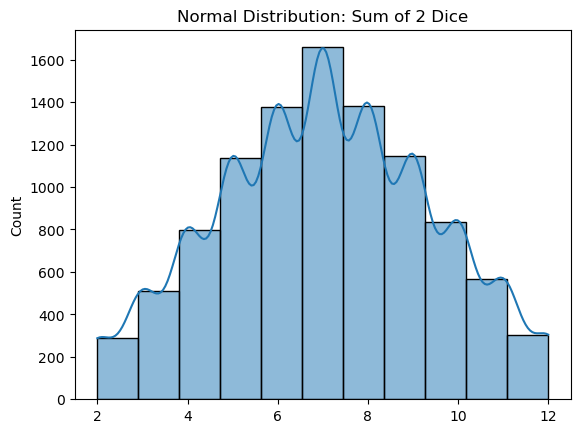

In [10]:
# Normal distribution - sum of 2 dice
two_dice_rolls = np.random.randint(1, 7, size=(10000, 2)).sum(axis=1)
sns.histplot(two_dice_rolls, bins=11, kde=True)
plt.title("Normal Distribution: Sum of 2 Dice")
plt.show()

---

## 3. Standardization 
Standardization is the process of converting data points from any normal distribution into a standard normal distribution. This is done using the Z-score, which tells you how many standard deviations a data point is from the mean.

The formula for the Z-score is:
\\[ Z = \frac{x - \mu} {\sigma} \\]
 
- x = value
- \\( \mu \\) = mean
- \\( \sigma \\) = standard deviation

A dataset standardized with Z-scores will have a mean (μ) of 0 and a standard deviation (σ) of 1. This makes it easier to compare data from different distributions. The Z-table is a statistical table that helps you find the probability associated with a specific Z-score.

In [24]:
# Dataset of 5 numbers
data = [10, 15, 20, 25, 30]

# Calculate the mean and standard deviation of the dataset
mean = np.mean(data)
std_dev = np.std(data, ddof=0)  # ddof=0 for population standard deviation


# Calculate the z-score for a specific data point (e.g., the number 25)
x = 25
z_score = (x - mean) / std_dev

# Print the results
print("Dataset: ",data)
print("Z-score for", (x), ":", z_score)

Dataset:  [10, 15, 20, 25, 30]
Z-score for 25 : 0.7071067811865475


---

## 4. Standard Error
When we work with samples, the standard error measures the variability of a sample statistic, like the mean. It tells us how much the sample mean is likely to vary from the true population mean.

The formula for the standard error (SE) is:
\\[ SE = \frac{\sigma} {\sqrt{n}} \\]

- σ is the population standard deviation.
- n is the sample size.

As the sample size (n) increases, the standard error decreases, meaning our sample mean becomes a more precise estimate of the population mean.

In [25]:
# Calculate the standard error (SE)
n = len(data)
standard_error = std_dev / np.sqrt(n)

print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Standard Error:", standard_error)

Mean: 20.0
Standard Deviation: 7.0710678118654755
Standard Error: 3.162277660168379


---

## 5. Confidence Interval (CI)

### What is a Confidence Interval?

A **confidence interval (CI)** is a range of values that we're pretty sure contains the true value of a population parameter. Instead of providing a single number as your best guess (like a point estimate), you give a range. This range gives you a more realistic idea of where the true value might be, accounting for the uncertainty that comes from using a sample.

Imagine you want to know the average height of all students in a large university, but you can only measure a small group of 50 students. Your sample's average height might be 5'9". A confidence interval goes a step further and says, "Based on my sample, I'm 95% confident that the true average height of all students in the university is somewhere between 5'7" and 5'11"."

---

### Key Components

-   **Confidence Level:** This is your level of certainty. A **95% confidence level** means that if you were to repeat the same sampling process many times, 95% of the confidence intervals you create would contain the true population average. A **99% confidence level** would give you a wider range, but a higher certainty of including the true average.

-   **Margin of Error:** This is the range added and subtracted from your sample's average to create the interval. In the example above, the sample average was 5'9", and the margin of error was 2 inches (5'9" ± 2 inches), which gives you the range from 5'7" to 5'11". The margin of error is calculated using the **standard error**, which measures how much your sample's average is likely to vary from the population's true average.

---

### Calculating the CI

To calculate a confidence interval, you need a few pieces of information from your sample data:
-   The **sample mean** (the best guess for the population average).
-   The **standard error** (how much your sample mean might vary from the true mean).
-   A **critical value** based on your desired confidence level (from a z-table or t-table).

The formula for a confidence interval is:

$$\text{CI} = \text{Sample Mean} \pm (\text{Critical Value} \times \text{Standard Error})$$

---

### Real life Confidence Interval Example: 10th Class Board Exam
Imagine you've completed your 10th-grade board exams. You might be asked, "How confident are you about your math score?"

- 95% Confidence Interval: "I am 95% confident that my math score will be between 85 and 90." This means if we were to repeat the sampling process 100 times, we would expect the true score to fall within this range 95 times. Here, 85 and 90 are the estimators that define the confidence interval, and the average of 85 and 90 is the estimate.

- 99% Confidence Interval: "I am 99% confident that my math score will be between 90 and 97." This interval is wider because being more confident (99% vs. 95%) requires a larger range to ensure the true score is included. The wider interval means there's a smaller chance of being wrong.





In [26]:
from scipy import stats

# Reusing the dataset from the previous example
data = [10, 15, 20, 25, 30]

# Sample size
n = len(data)
# Sample mean
sample_mean = np.mean(data)
# Sample standard deviation (ddof=1 for sample standard deviation)
sample_std = np.std(data, ddof=1)
# Standard error of the mean
standard_error = sample_std / np.sqrt(n)

# For a 95% confidence level, the alpha value is 0.05
# The critical value (t_score) is found using the t-distribution
# with n-1 degrees of freedom and alpha/2
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)

# Calculate the margin of error
margin_of_error = t_critical * standard_error

# Calculate the confidence interval
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"Sample Data: {data}")
print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"Standard Error of the Mean: {standard_error:.2f}")
print(f"T-critical value for 95% CI: {t_critical:.2f}")
print(f"Margin of Error: {margin_of_error:.2f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

Sample Data: [10, 15, 20, 25, 30]
Sample Mean: 20.0
Sample Standard Deviation: 7.91
Standard Error of the Mean: 3.54
T-critical value for 95% CI: 2.78
Margin of Error: 9.82
95% Confidence Interval: (10.18, 29.82)


---

## 6. Z-test vs. T-test 

Confidence intervals can be calculated in two main ways, depending on what we know about the population:

-   **Z-test:** Used when the population variance is known. This is rare because you usually don't have that information.
-   **T-test:** Used when the population variance is unknown and we must estimate it from the sample. This is the more common scenario in practice.


Both the **Z-test** and **T-test** are statistical methods used to determine if the mean of a sample is significantly different from a population mean. The choice between the two depends on whether you know the population's standard deviation (σ) and the size of your sample (n).

### Z-Test

The **Z-test** is used when you have a **large sample size** (n>30) or when you **know the population standard deviation (σ)**.

* **Purpose**: To test if a sample mean is statistically different from a known population mean.
* **Key Assumption**: The data is normally distributed and the population standard deviation (σ) is known.
* **Why it's used**: Because with a known population standard deviation, you can standardize the sample mean using a Z-score and compare it to the standard normal distribution (the Z-table). This allows for a very precise calculation of probability.

The formula for the Z-statistic is:

$$Z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}}$$

- \\( \bar{x} \\) - sample mean
- \\( \mu \\) - population mean
- \\( \sigma \\) - population standard deviation
- n - sample size
  

### T-Test

The **T-test** is used when you have a **small sample size** (n < 30) and the **population standard deviation is unknown**.

* **Purpose**: To test if a sample mean is statistically different from a known or hypothesized population mean when you have to estimate the standard deviation.
* **Key Assumption**: The data is normally distributed, and the population standard deviation is unknown.
* **Why it's used**: When you don't know the population's standard deviation, you have to use the sample's standard deviation (s) as an estimate. This adds a layer of uncertainty. The T-distribution, which is flatter and has "heavier tails" than the normal distribution, accounts for this extra uncertainty, making it more accurate for small samples. As the sample size grows, the T-distribution starts to look more and more like the normal distribution.

The formula for the T-statistic is:

$$T = \frac{\bar{x} - \mu}{s / \sqrt{n}}$$

- \\( \bar{x} \\) - sample mean
- \\( \mu \\) - population mean
- \\( \sigma \\) - population standard deviation
- s = sample standard deviation


---

## 7. Z-Test: Putting it all together

The **Z-test** is a statistical test used to determine if there is a significant difference between a sample mean and a population mean. It's built on the concepts: Z-score, Z-table, and confidence intervals.

- **Z-score**: A standardized variable with a mean of 0 and a standard deviation of 1. It helps us find the exact position of a data point within a distribution.

- **Z-table**: A lookup table that provides the area (or probability) under the standard normal curve for a given Z-score. This is used to find the critical values for our confidence interval.

- **Z-test**: The actual statistical procedure used to test a hypothesis. We use Z-scores and Z-tables to calculate a confidence interval and determine whether our sample data is significantly different from the population data.

---

## Summary – Inferential Statistics 

In this notebook, I explored the fundamentals of Inferential Statistics, which help us make predictions and conclusions about populations using sample data.

- **Probability:** Introduced using simple coin toss and dice roll examples.

- **Distributions:** Learned how single dice rolls follow a uniform distribution, while combined dice rolls approximate a normal distribution.

- **Standardization (Z-score):** Introduced the concept of converting values to a standard scale with mean = 0 and SD = 1.

- **Standard Error (SE):** Explained how SE measures the accuracy of the sample mean compared to the population mean.

- **Confidence Interval (CI):** Understood CI with formulas and real-world examples.

- **Z-test vs T-test:** Both Z-tests and T-tests are statistical tools for comparing a sample mean to a population mean. 
- **Z-test vs Z-score vs Z-table:** Clarified the differences and use cases in statistical testing.